In [36]:
# ライブラリの読み込み
import os
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# グラフをインラインで表示させる
%matplotlib inline

In [37]:
os.getcwd()

'C:\\Users\\world\\Downloads\\property-price-prediction-challenge'

In [38]:
df_train=pd.read_csv('./train_set.csv')
df_test=pd.read_csv('./test_set.csv')

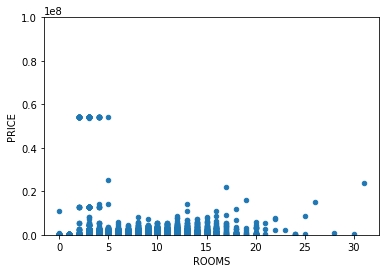

In [63]:
data = pd.concat([df_train['PRICE'], df_train['ROOMS']], axis=1)
data.plot.scatter(x='ROOMS', y='PRICE', ylim=(0,100000000))

In [40]:
df_train.CENSUS_BLOCK.value_counts

<bound method IndexOpsMixin.value_counts of 0        004201 2006
1        004201 2006
2        004201 2005
3        004201 2005
4        004201 2005
5        005201 4003
6        005201 4003
7        005201 4003
8        005201 4003
9        005201 4003
10       005201 4003
11       005201 4003
12       005201 4002
13       005201 4002
14       004300 2006
15       004300 2006
16       005201 2000
17       005201 2000
18       004201 1002
19       004201 1002
20       004201 1006
21       004201 1004
22       004201 1004
23       005500 1001
24       005500 1001
25       005500 1001
26       005500 1001
27       005500 1005
28       005500 1005
29       005500 1005
            ...     
49078            NaN
49079            NaN
49080            NaN
49081            NaN
49082            NaN
49083            NaN
49084            NaN
49085            NaN
49086            NaN
49087            NaN
49088            NaN
49089            NaN
49090            NaN
49091            NaN
49092      

In [67]:
df_train.ROOMS.value_counts()


6     9963
4     7892
3     6998
7     5956
5     5253
8     4646
9     2063
2     1881
10    1808
12     942
11     678
16     395
13     207
14     169
15      77
18      38
20      37
1       31
0       27
17      22
19       8
24       4
21       3
22       3
25       2
30       1
23       1
26       1
28       1
31       1
Name: ROOMS, dtype: int64

In [70]:
df_train.groupby('SOURCE')['ROOMS'].value_counts().unstack().tail()

ROOMS,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,28,30,31
SOURCE,,,,,,,,,,,,,,,,,,,,,
Condominium,6.0,30.0,1873.0,6928.0,7255.0,2845.0,847.0,184.0,60.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residential,21.0,1.0,8.0,70.0,637.0,2408.0,9116.0,5772.0,4586.0,2055.0,...,37.0,3.0,3.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0


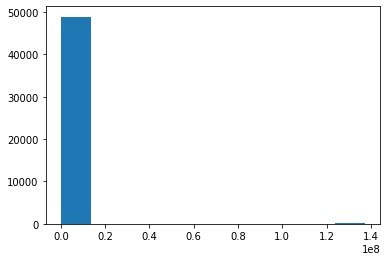

In [71]:
plt.hist(df_train['PRICE'])
plt.show()

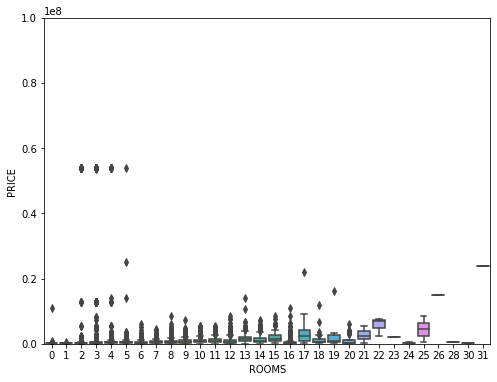

In [65]:
var = 'ROOMS'
data = pd.concat([df_train['PRICE'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,  y="PRICE", data=data)
fig.axis(ymin=0, ymax=100000000);

In [58]:
df_train.groupby('ROOMS',as_index=False).PRICE.median()

,ROOMS,PRICE
0,0,170000.0
1,1,240000.0
2,2,225000.0
3,3,330000.0
4,4,431950.0
5,5,424000.0
6,6,369000.0
7,7,426225.0
8,8,550000.0
9,9,691000.0


AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

(array([8.9370e+03, 2.3108e+04, 1.2665e+04, 3.4280e+03, 4.5300e+02,
        4.5500e+02, 4.8000e+01, 8.0000e+00, 3.0000e+00, 3.0000e+00]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

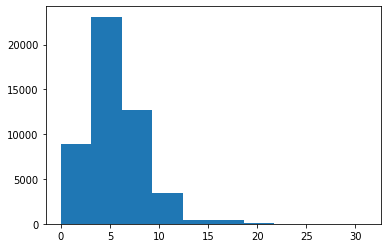

In [55]:
plt.hist(df_train['ROOMS'])

In [29]:
df_all= pd.DataFrame(df_train)
df_PRICE=df_all.groupby('ROOMS')
df_PRICE

df_train.groupby('ROOMS').count()

,Id,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,BEDRM,AYB,YR_RMDL,EYB,...,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT,PRICE
ROOMS,,,,,,,,,,,,,,,,,,,,,
0,27,27,27,27,27,21,27,27,6,27,...,27,26,27,21,27,27,27,27,27,27
1,31,31,31,31,31,1,31,30,20,31,...,31,29,31,0,31,31,31,31,31,31
2,1881,1881,1881,1881,1881,8,1881,1881,1419,1881,...,1881,1033,1881,8,1881,1881,1881,1881,1881,1881
3,6998,6998,6998,6998,6998,70,6998,6997,4428,6998,...,6998,4718,6998,70,6998,6998,6998,6998,6998,6998
4,7892,7892,7892,7892,7892,637,7892,7883,4737,7892,...,7892,6072,7892,631,7892,7892,7892,7892,7892,7892
5,5253,5253,5253,5253,5253,2408,5253,5247,2794,5253,...,5253,4217,5253,2384,5253,5253,5249,5249,5249,5253
6,9963,9963,9963,9963,9963,9116,9963,9949,5140,9963,...,9963,8656,9963,9080,9963,9963,9943,9943,9943,9963
7,5956,5956,5956,5956,5956,5772,5956,5950,3138,5956,...,5956,4939,5956,5745,5956,5956,5955,5955,5955,5956
8,4646,4646,4646,4646,4646,4586,4646,4636,2778,4646,...,4646,3882,4646,4560,4646,4646,4636,4636,4636,4646


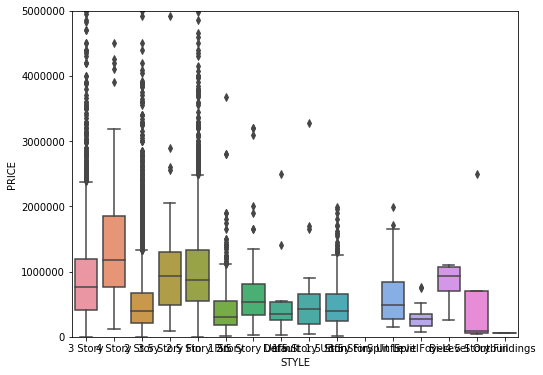

In [308]:
var = 'STYLE'
data = pd.concat([df_train['PRICE'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,  y="PRICE", data=data)
fig.axis(ymin=0, ymax=5000000);

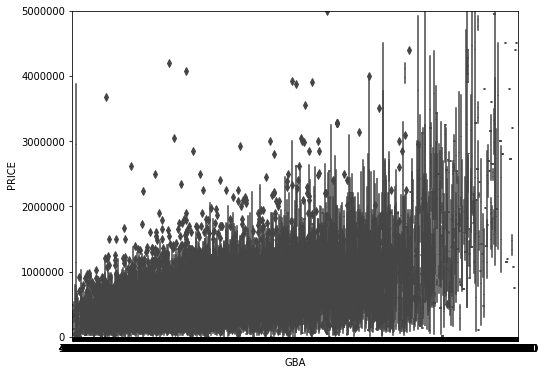

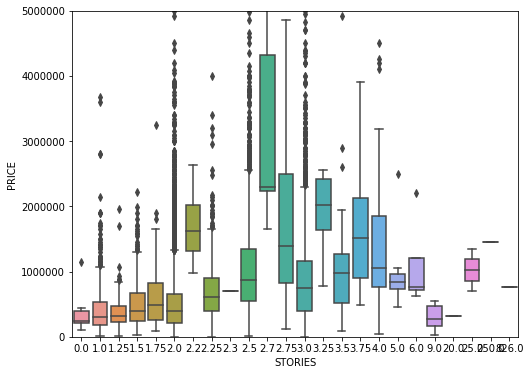

In [310]:
var = 'STORIES'
data = pd.concat([df_train['PRICE'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,  y="PRICE", data=data)
fig.axis(ymin=0, ymax=5000000);

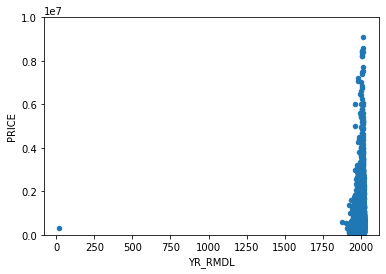

In [316]:
data = pd.concat([df_train['PRICE'], df_train['YR_RMDL']], axis=1)
data.plot.scatter(x='YR_RMDL', y='PRICE', ylim=(0,10000000))

In [314]:
df_train.drop(df_train[df_train['YR_RMDL']<=100].index,inplace=True)

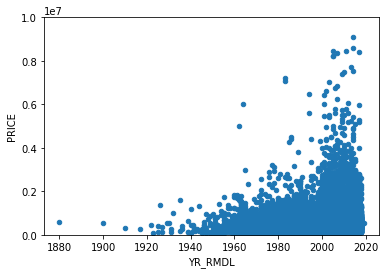

In [312]:
data = pd.concat([df_train['PRICE'], df_train['YR_RMDL']], axis=1)
data.plot.scatter(x='YR_RMDL', y='PRICE', ylim=(0,10000000))

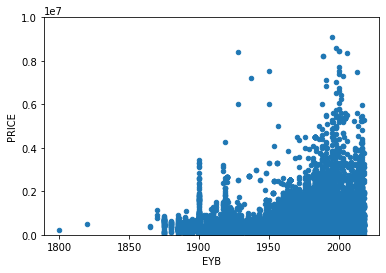

In [313]:
data = pd.concat([df_train['PRICE'], df_train['EYB']], axis=1)
data.plot.scatter(x='EYB', y='PRICE', ylim=(0,10000000))

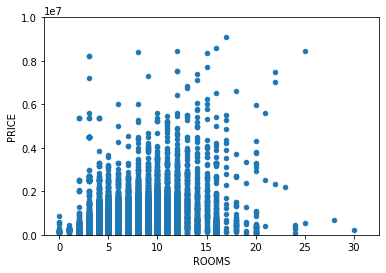

In [277]:
data = pd.concat([df_train['PRICE'], df_train['ROOMS']], axis=1)
data.plot.scatter(x='ROOMS', y='PRICE', ylim=(0,10000000))

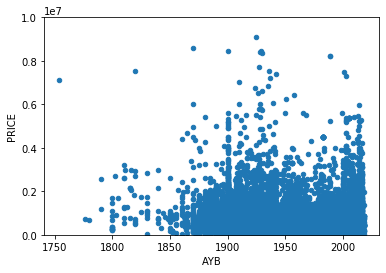

In [295]:
data = pd.concat([df_train['PRICE'], df_train['AYB']], axis=1)
data.plot.scatter(x='AYB', y='PRICE', ylim=(0,10000000))

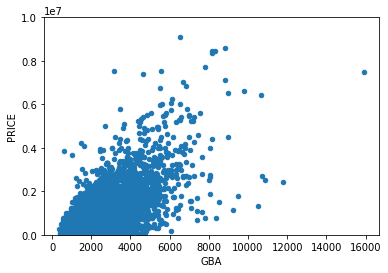

In [279]:
data = pd.concat([df_train['PRICE'], df_train['GBA']], axis=1)
data.plot.scatter(x='GBA', y='PRICE', ylim=(0,10000000))

In [280]:
df_test=pd.read_csv('./test_set.csv')

C:\Users\world\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [281]:
def kesson_table(df): 
 null_val = df.isnull().sum()
 percent = 100 * df.isnull().sum()/len(df)
 kesson_table = pd.concat([null_val, percent], axis=1)
 kesson_table_ren_columns = kesson_table.rename(
 columns = {0 : '欠損数', 1 : '%'})
 return kesson_table_ren_columns
kesson_table(df_train)

,欠損数,%
Id,0,0.000000
BATHRM,0,0.000000
HF_BATHRM,0,0.000000
HEAT,0,0.000000
AC,0,0.000000
NUM_UNITS,20053,40.834487
ROOMS,0,0.000000
BEDRM,0,0.000000
AYB,56,0.114034
YR_RMDL,20418,41.577747


In [282]:
kesson_table(df_test)

,欠損数,%
Id,0,0.000000
BATHRM,0,0.000000
HF_BATHRM,0,0.000000
HEAT,0,0.000000
AC,0,0.000000
NUM_UNITS,20263,41.262116
ROOMS,0,0.000000
BEDRM,0,0.000000
AYB,56,0.114034
YR_RMDL,20124,40.979067


In [283]:
df_train.drop(df_train[df_train['ROOMS']>=28].index,inplace=True)

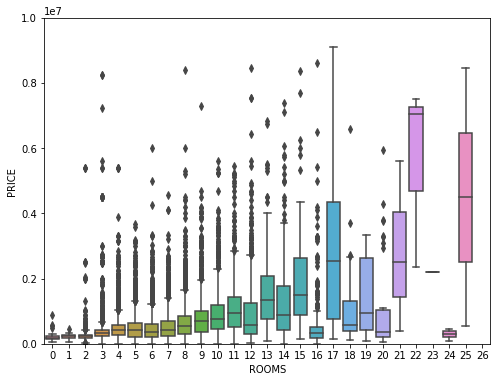

In [284]:
var = 'ROOMS'
data = pd.concat([df_train['PRICE'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,  y="PRICE", data=data)
fig.axis(ymin=0, ymax=10000000);

In [285]:
clf =LinearRegression()

In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [287]:
clf =LinearRegression()

In [288]:
df_y=df_train['PRICE']

In [289]:
df_train_shrinked=df_train.loc[:,['ZIPCODE','ROOMS','AC','FIREPLACES']]
df_x=df_train_shrinked

In [290]:
df_x=pd.get_dummies(df_x)

In [291]:
clf.fit(df_x, df_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [292]:
import statsmodels.api as sm
model = sm.OLS(df_y, df_x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     38.92
Date:                Thu, 29 Aug 2019   Prob (F-statistic):           4.89e-40
Time:                        16:27:58   Log-Likelihood:            -8.4355e+05
No. Observations:               49105   AIC:                         1.687e+06
Df Residuals:                   49099   BIC:                         1.687e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ZIPCODE     -499.6468   2036.525     -0.245      0.806   -4491.260    3491.966
ROOMS      -9.088e+04   1.21e+04     -7.506      0.000   -1.15e+05   -6.72e+04
FIREPLACES   178.9044     23.775      7.525      0.000     132.305     225.503
AC_0        1.076e+07   4.08e+07      0.264      0.792   -6.92e+07    9.07e+07
AC_N        1.096e+07   4.08e+07      0.269      0.788   -6.89e+07    9.08e+07
AC_Y        1.159e+07   4.08e+07      0.284      0.776   -6.83e+07    9.15e+07
==============================================================================
Omnibus:                   102352.290   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        249397866.406
Skew:                          18.320   Prob(JB):                         0.00
Kurtosis:                     350.204   Cond. No.                     4.48e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

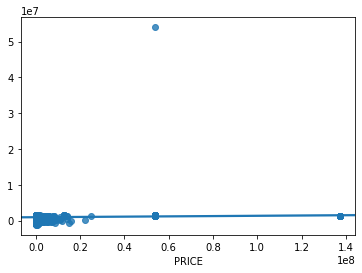

In [293]:
sns.regplot(df_y,clf.predict(df_x))

In [294]:
from sklearn.metrics import mean_squared_error
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [269]:
rmse(clf.predict(df_x),df_y)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [251]:
def preprocess(train_flg):
    # train set の場合の処理
    if train_flg:
        df=pd.read_csv('./train_set.csv')
        df_train.drop(df_train[df_train['ROOMS']>=28].index,inplace=True)
        df_y = df['PRICE']
    else:
        df=pd.read_csv('./test_set.csv')
    # 使う変数を定義
    cols = ['ZIPCODE','ROOMS','AC','GRADE']
    df_x = df.loc[:,cols]
    #欠損値　-> 'NA'　に変換
    #df_x.loc[df_x['BsmtQual'].isnull()==True,'BsmtQual']='NA'
    # dummy
    #df_x=pd.get_dummies(df_x)
    # train set の場合のoutput
    if train_flg:
        return df_x,df_y
    # test set の場合のoutput、kaggleへ提出するファイルの規定により、idも一緒に出力する
    else:
        return df_x,df['Id']

In [255]:
clf = LinearRegression()

In [257]:
# train set
# 前処理の統合変数を使う
df_x,df_y = preprocess(train_flg=True)

# linear regressionで検証
clf.fit(df_x, df_y)
#rmse(clf.predict(df_x),df_y)

C:\Users\world\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3248: DtypeWarning: Columns (17,18,19,20,21,22,23,32,33,34,36,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


ValueError: could not convert string to float: 'Y'

In [253]:
# test set
# 前処理の統合変数を使う
df_test_x,df_test_id = preprocess(train_flg=False)
y_pred = clf.predict(df_test_x)

pred_df = pd.DataFrame(y_pred, index=df_test_id, columns=["PRICE"]
pred_df.to_csv('./output.csv', header=True, index_label='Id')

SyntaxError: invalid syntax (<ipython-input-253-54d18e79f5a3>, line 7)

In [ ]:
var = 'GIS_LAST_MOD_DTTM'
data = pd.concat([df_train['PRICE'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var,  y="PRICE", data=data)
fig.axis(ymin=0, ymax=1000000);
pd.crosstab(df_train.GIS_LAST_MOD_DTTM, df_train.PRICE)
df_train.GIS_LAST_MOD_DTTM.value_counts